In [1]:
################################################################################
# Filename: magnitude_analysis.ipynb
# Purpose:  Visualize the magnitude of the frequency analysis.
# Author:   Livia Chandra & Roshni Venkat
#
# Description:
# This file is used to create graph to visualize the magnitude of the frequency 
# from conversion of wav file to MIDI file. 
#
# Usage (Optional):
# [Instructions or examples demonstrating how to use the code in this file.
# Include any dependencies or prerequisites required for proper usage.]
#
# Notes:
# [Any additional notes, considerations, or important information
# about the file that may be relevant to developers or users.]
#
###############################################################################

In [2]:
import numpy as np
import scipy.io.wavfile as wav
import librosa as lb
import matplotlib.pyplot as plt 

In [3]:
# Obtain audio data of audio file using librosa
raw_audio, _ = lb.load('sample1.wav')
raw_audio

array([-0.03851133,  0.04146759,  0.01639824, ...,  0.06243297,
        0.06134623,  0.03674722], dtype=float32)

In [4]:
# Use short-time fourier transform to analyze frequency of audio file
audio_stft = lb.stft(raw_audio)
audio_stft

array([[ 2.94907987e-01+0.00000000e+00j,  1.23860255e-01+0.00000000e+00j,
        -3.93633470e-02+0.00000000e+00j, ...,
         2.01390423e-02+0.00000000e+00j, -3.38201933e-02+0.00000000e+00j,
        -7.27443576e-01+0.00000000e+00j],
       [-3.03786516e-01-8.44510086e-03j,  1.78016834e-02-1.62144959e-01j,
         2.05368567e-02-6.36321842e-04j, ...,
        -8.17283057e-03-3.64787281e-02j,  4.32644151e-02+3.90822021e-03j,
        -4.71903272e-02-7.15596318e-01j],
       [ 3.11451465e-01+2.02787621e-03j, -1.58004731e-01+2.80589308e-03j,
        -2.82656314e-04-7.46940786e-04j, ...,
         3.87263335e-02-1.54183330e-02j, -4.52979505e-02+4.23141457e-02j,
         8.56096625e-01-1.51524886e-01j],
       ...,
       [-2.52326857e-02+1.00277073e-03j,  1.23659046e-02-4.98646812e-04j,
        -1.06842776e-06-4.09540171e-08j, ...,
         1.65779488e-06-1.47994186e-07j, -5.16764942e-08-1.88942920e-07j,
         1.11344224e-03-1.37973679e-04j],
       [ 2.52369959e-02-5.00980241e-04j, -2.

In [5]:
# Obtain the magnitude of the frequency
magnitude_stft, _ = lb.magphase(audio_stft)
magnitude_stft

array([[2.94907987e-01, 1.23860255e-01, 3.93633470e-02, ...,
        2.01390423e-02, 3.38201933e-02, 7.27443576e-01],
       [3.03903878e-01, 1.63119242e-01, 2.05467138e-02, ...,
        3.73830535e-02, 4.34405766e-02, 7.17150569e-01],
       [3.11458081e-01, 1.58029631e-01, 7.98633322e-04, ...,
        4.16827798e-02, 6.19870275e-02, 8.69402826e-01],
       ...,
       [2.52526011e-02, 1.23759536e-02, 1.06921232e-06, ...,
        1.66438758e-06, 1.95882336e-07, 1.12195825e-03],
       [2.52419692e-02, 1.23702222e-02, 3.50019491e-07, ...,
        4.33148273e-07, 2.65167358e-07, 1.11635379e-03],
       [2.52361074e-02, 1.23683866e-02, 3.80675090e-07, ...,
        1.68312579e-06, 2.11211841e-07, 1.11461442e-03]], dtype=float32)

In [6]:
# Convert magnitude into decibles
db_stft = lb.amplitude_to_db(magnitude_stft)
db_stft

array([[-10.60627 , -18.141361, -28.09816 , ..., -33.919224, -29.416477,
         -2.764014],
       [-10.345276, -15.749895, -33.74515 , ..., -28.546505, -27.242088,
         -2.887793],
       [-10.132008, -16.02523 , -37.532368, ..., -27.600868, -24.153984,
         -1.215579],
       ...,
       [-31.953878, -37.532368, -37.532368, ..., -37.532368, -37.532368,
        -37.532368],
       [-31.957535, -37.532368, -37.532368, ..., -37.532368, -37.532368,
        -37.532368],
       [-31.959553, -37.532368, -37.532368, ..., -37.532368, -37.532368,
        -37.532368]], dtype=float32)

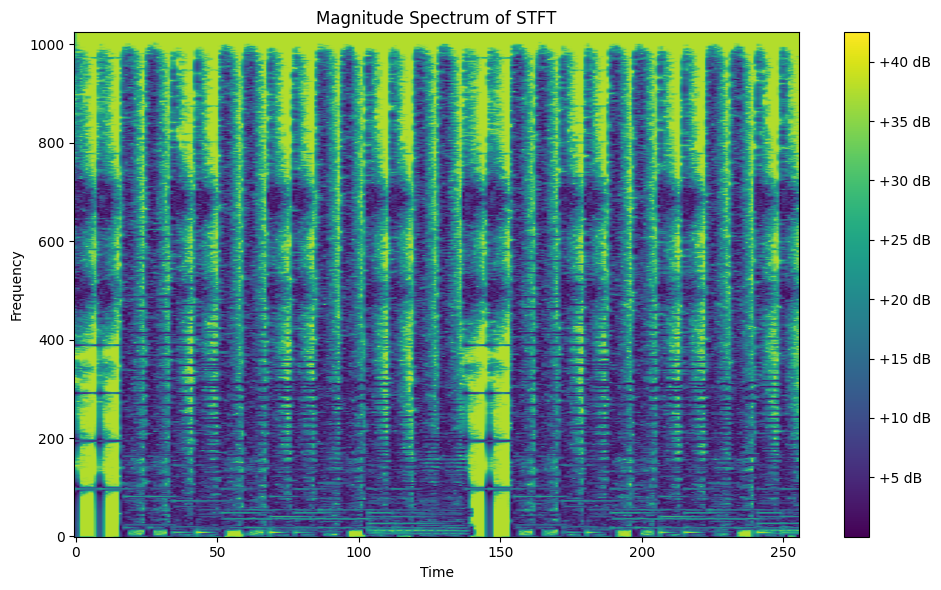

In [7]:
# Visualize the magnitude of the frequencies
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(db_stft), aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude Spectrum of STFT')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

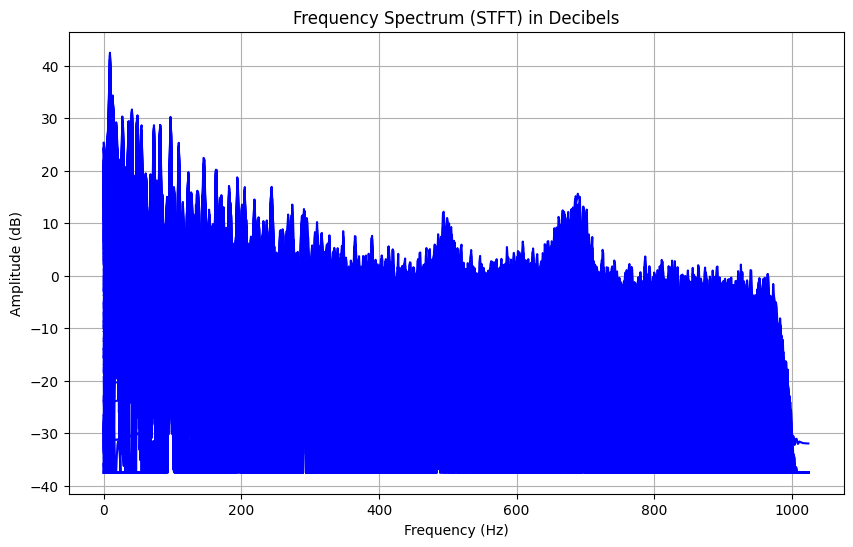

In [8]:
# Plot the frequency spectrum against amplitude in decibels
plt.figure(figsize=(10, 6))
plt.plot(db_stft, color = 'blue')
plt.title('Frequency Spectrum (STFT) in Decibels')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.show()

In [9]:
# Use fast-fourier transform from numpy
raw_audio_arr = np.array(raw_audio, dtype = float)
audio_fft = np.fft.fft(raw_audio_arr)
audio_fft

array([-555.37772827-8.88178420e-15j,  -33.91963727+3.09025958e+00j,
        164.50504441+6.49894572e+01j, ...,   59.67548518-1.41449545e+01j,
        164.50504441-6.49894572e+01j,  -33.91963727-3.09025958e+00j])

In [10]:
# Obtain magnitude of audio file using function from librosa
magnitude_fft, _ = lb.magphase(audio_fft)
magnitude_fft

array([555.37772827,  34.06011592, 176.87718671, ...,  61.32897576,
       176.87718671,  34.06011592])

In [11]:
# Convert magnitude into decibles
db_fft = lb.amplitude_to_db(magnitude_fft)
db_fft

array([54.89176919, 30.64492243, 44.95343644, ..., 35.75331423,
       44.95343644, 30.64492243])

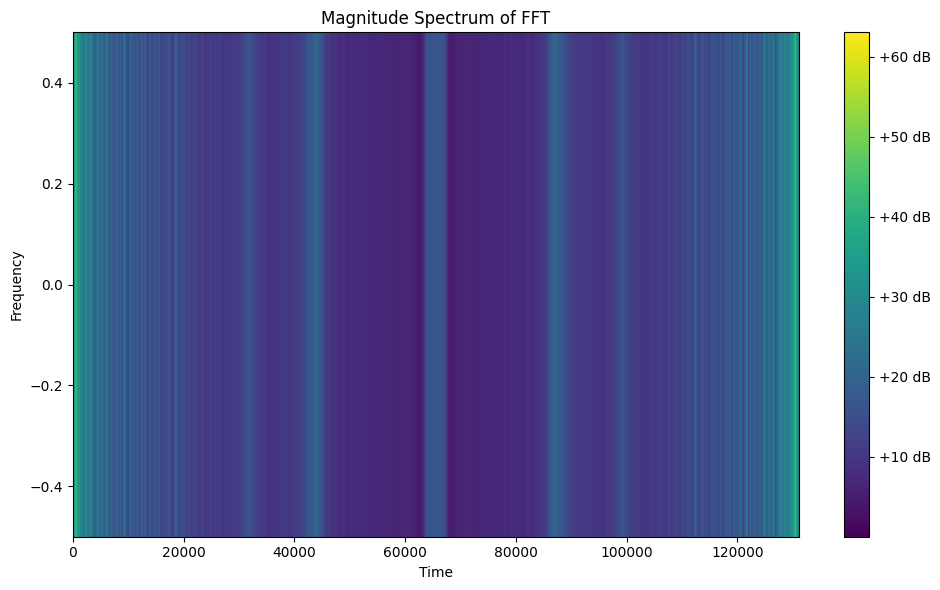

In [12]:
# Visualize the magnitude of the frequencies 
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(db_fft[np.newaxis, :]), aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude Spectrum of FFT')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

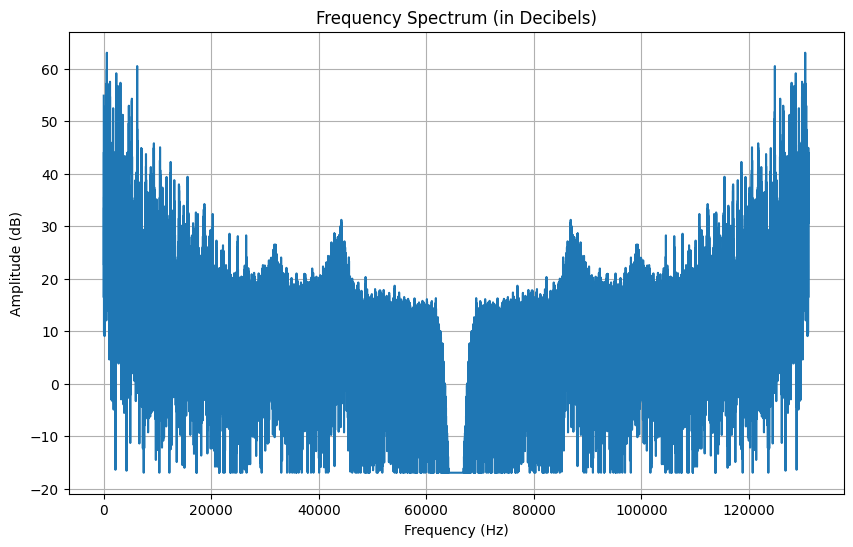

In [13]:
# Plotting the frequency spectrum against amplitude in decibels
plt.figure(figsize=(10, 6))
plt.plot(db_fft)
plt.title('Frequency Spectrum (in Decibels)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.show()